In [15]:
import pickle
import emd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import sys
%matplotlib inline
#%matplotlib qt

In [16]:
data_path = "C:/Users/blaze/Desktop/opsi_eeg_denoising/eeg-denoising/data/eeg_dataset.pkl"
with open(data_path, "rb") as f:
    eeg_datasets_dict = pickle.load(f)

In [17]:
noisy_eeg_dataset = eeg_datasets_dict["datasets_artnoise_mne_format"]
original_eeg_dataset = eeg_datasets_dict["datasets_mne_format"]

In [25]:
artifical_noise_eeg = noisy_eeg_dataset["noisy_scaled_eeg"]
channel_names = original_eeg_dataset["channel_names"]
original_eeg = original_eeg_dataset["original_scaled_eeg"]

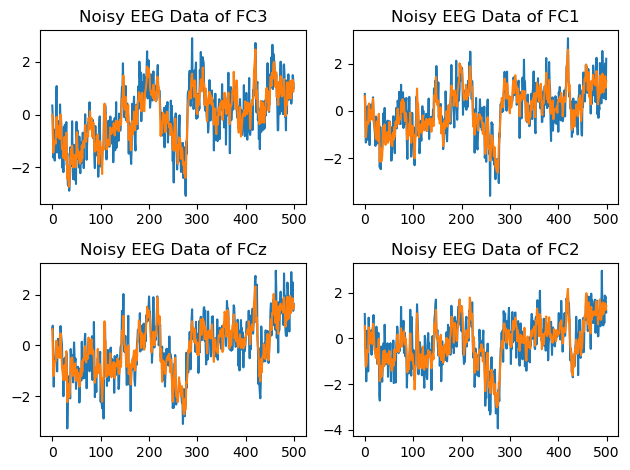

In [26]:
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.plot(artifical_noise_eeg[i][:500])
    plt.title(f"Original EEG Data of {channel_names[i]}")
    plt.plot(original_eeg[i][:500])
    plt.title(f"Noisy EEG Data of {channel_names[i]}")
    plt.tight_layout()
plt.show()


In [27]:
# EMD IMFs
signal_imfs = []
for i, s in enumerate(artifical_noise_eeg):
    imfs = emd.sift.sift(s)
    signal_imfs.append(imfs)

In [32]:
for signal in artifical_noise_eeg:
    print(signal.shape)


(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)
(60000,)


In [33]:
# EEMD IMFs - Ensemble EMD
max_cores = os.cpu_count()
ensemble_imfs = []
for i, signal in enumerate(artifical_noise_eeg):
    print(f"Signal {i+1} of {len(artifical_noise_eeg)}")
    signal_ensembles = []
    ensembles_to_use = [25,50,100]
    for ensembles in ensembles_to_use:
        imfs = emd.sift.ensemble_sift(signal,nensembles=ensembles, nprocesses=6, ensemble_noise=0.3)
        print(f"Ensembles: {ensembles} done!")

        ensembles_dict = {
            "ensembles": ensembles,
            "imfs": imfs
        }
        signal_ensembles.append(ensembles_dict)
    ensemble_imfs.append(signal_ensembles)

Signal 1 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 2 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 3 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 4 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 5 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 6 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 7 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 8 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 9 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 10 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 11 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 12 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 13 of 64
Ensembles: 25 done!
Ensembles: 50 done!
Ensembles: 100 done!
Signal 1

25
50
100


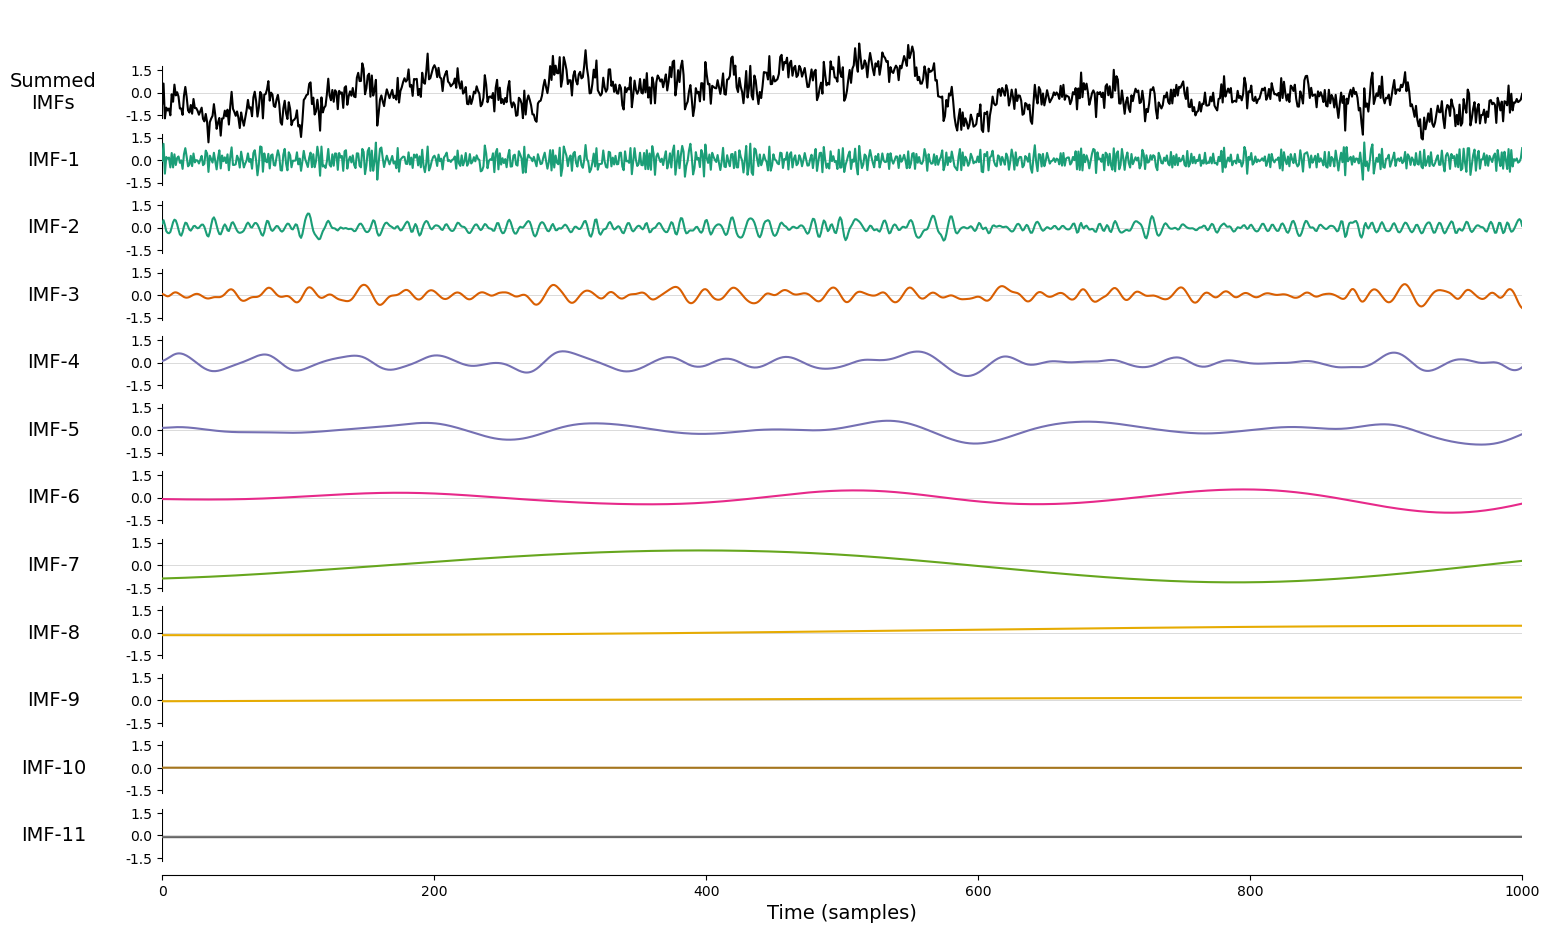

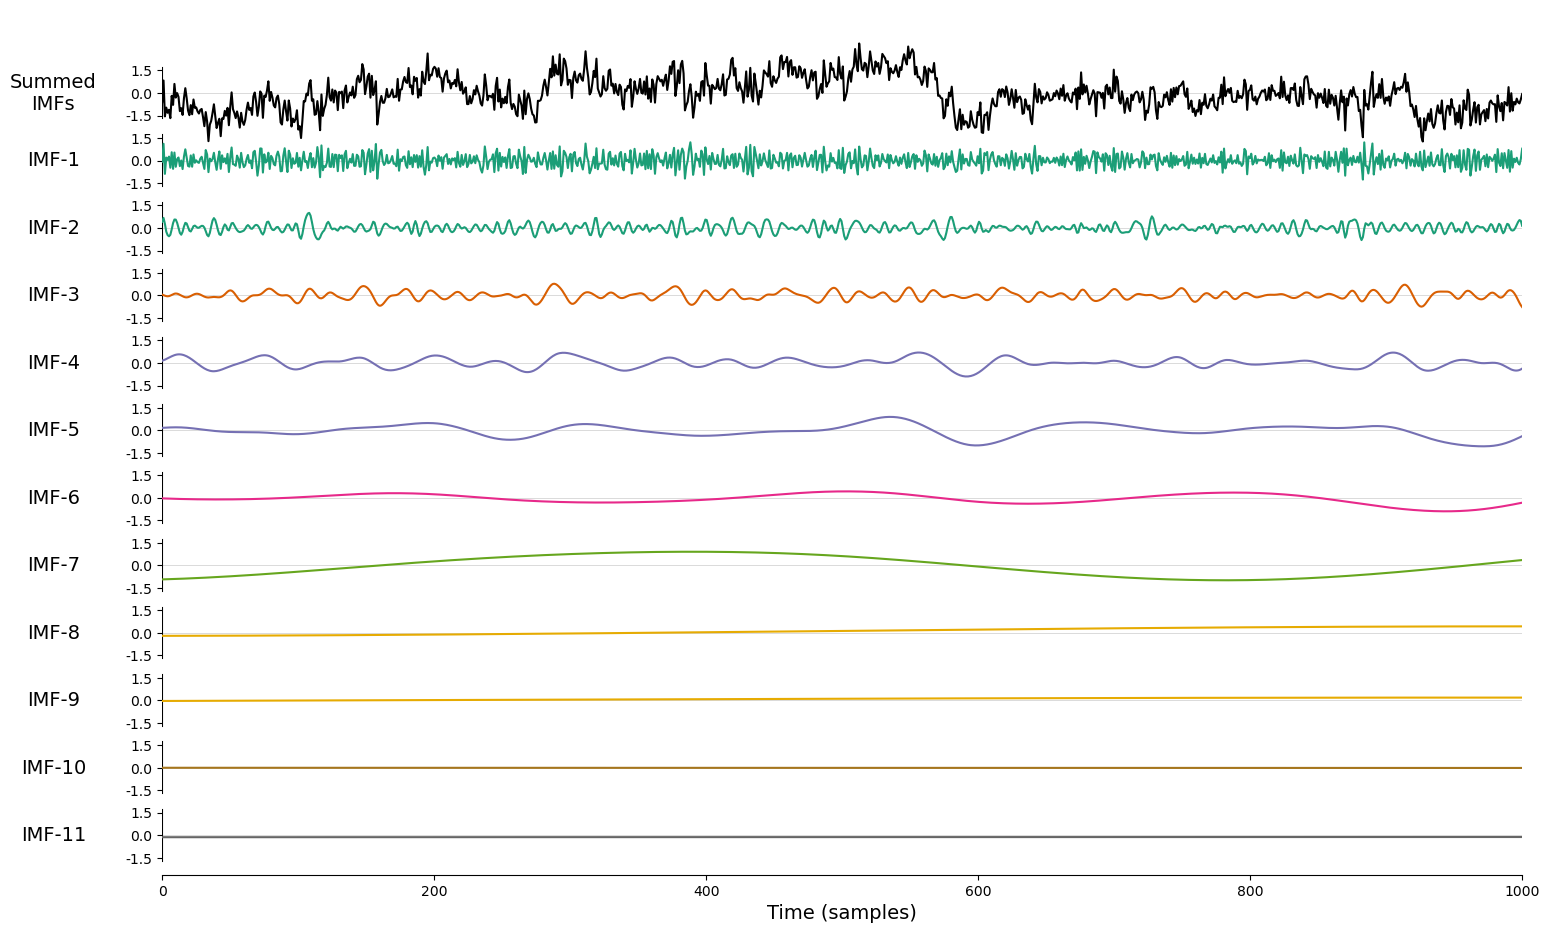

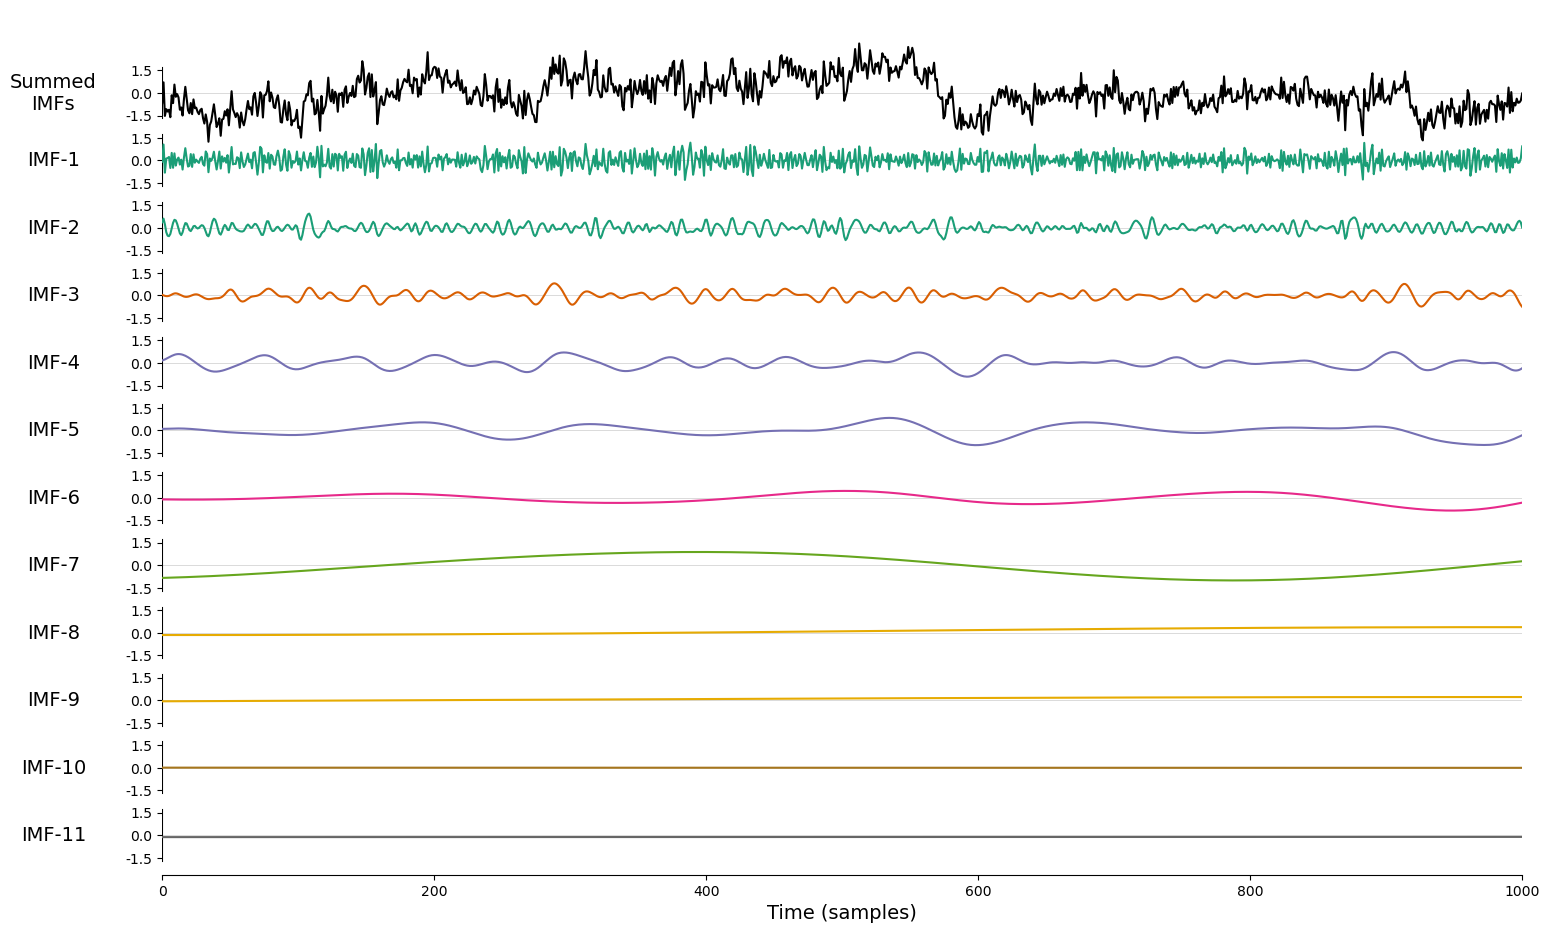

In [ ]:
first_signal = ensemble_imfs[0]

for ensemble in first_signal:
    signal = ensemble["imfs"]
    print(ensemble["ensembles"])
    emd.plotting.plot_imfs(signal[:1000,:])

<Axes: xlabel='Time (samples)'>

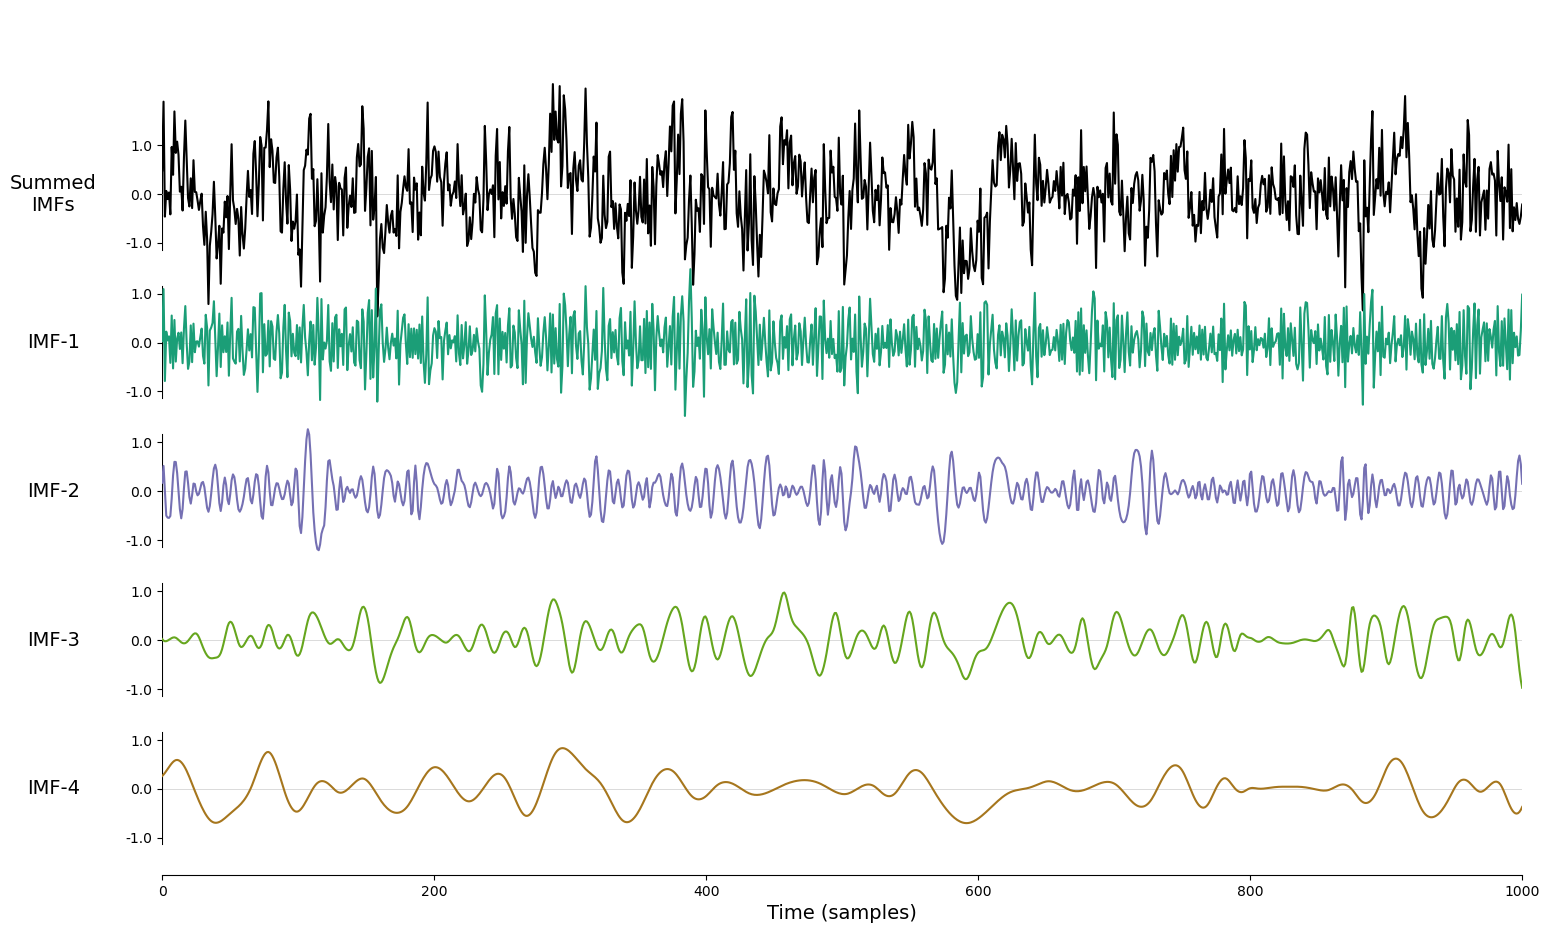

In [35]:
# Plotting the first signal's IMFS - channel FC5
imf = signal_imfs[0]
emd.plotting.plot_imfs(imf[:1000,:4])

In [36]:
ensemble_imfs[0][0].keys()

dict_keys(['ensembles', 'imfs'])

In [37]:
first_signal = first_signal[0]["imfs"]

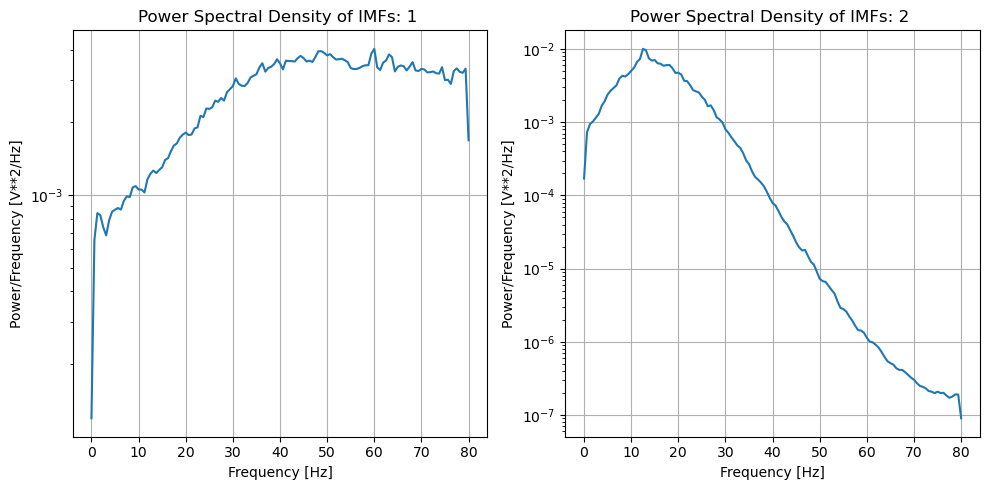

In [39]:
# Decide how many IMFs to keep - EMD
from scipy.signal import welch
IMFS_TO_CHECK = 2
k=1
plt.figure(figsize=(10, 5))
for i in range(IMFS_TO_CHECK):
    imfs = imf[:, i]
    f, Pxx = welch(imfs, fs=160)
    plt.subplot(1,2,k)
    plt.semilogy(f, Pxx)
    plt.title(f'Power Spectral Density of IMFs: {i+1} ')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [V**2/Hz]')
    plt.grid()
    plt.tight_layout()
    k = k + 1

plt.show()


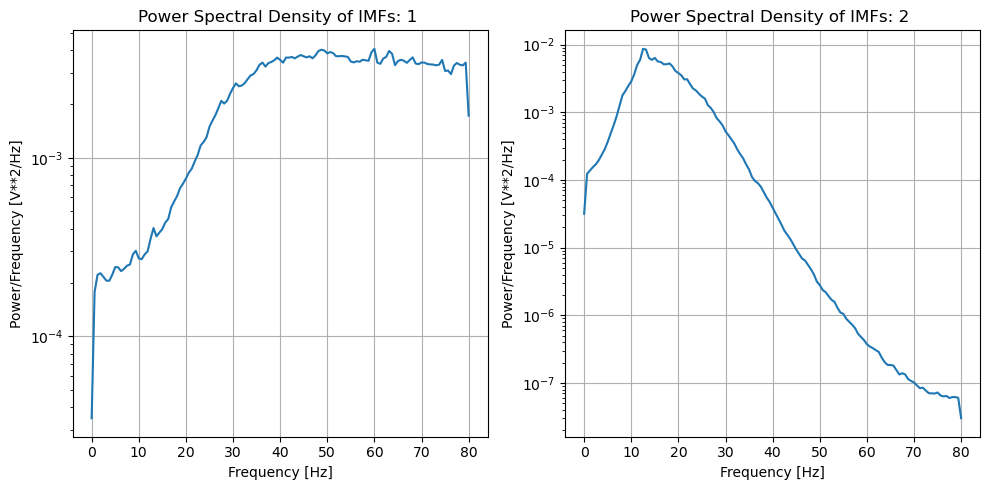

In [40]:
# Ensemble EMD - PSD
first_signal = ensemble_imfs[0][0]["imfs"]
IMFS_TO_CHECK = 2
k=1
plt.figure(figsize=(10, 5))
for i in range(IMFS_TO_CHECK):
    imfs = first_signal[:, i]
    f, Pxx = welch(imfs, fs=160)
    plt.subplot(1,2,k)
    plt.semilogy(f, Pxx)
    plt.title(f'Power Spectral Density of IMFs: {i+1} ')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [V**2/Hz]')
    plt.grid()
    plt.tight_layout()
    k = k + 1

plt.show()

In [42]:
results_emd = []
results_eemd = []

In [43]:
original_eeg_dataset = {
    "dataset_original": original_eeg_dataset,
    "dataset_noisy": noisy_eeg_dataset,
}

In [44]:
IMFS_TO_REMOVE = 2
for n_imfs in range(1,IMFS_TO_REMOVE+1):
    denoised_dict = {
        "parameter_sets": [],
        "denoised_signals": [],
    }
    for signal in signal_imfs:
        reconstructed_signal = np.sum(signal[:,n_imfs:],axis=1)
        denoised_dict["parameter_sets"].append(n_imfs)
        denoised_dict["denoised_signals"].append(reconstructed_signal)
    results_emd.append(denoised_dict)


In [45]:
IMFS_TO_REMOVE = 1

signals = []
for signal in ensemble_imfs:
    denoised_dict = {
        "parameter_sets": [],
        "denoised_signals": [],
    }
    for comb in signal: 
        imfs = comb["imfs"]
        param = comb["ensembles"]

        reconstructed_signal = np.sum(imfs[:,IMFS_TO_REMOVE:], axis=1)
        denoised_dict["parameter_sets"].append(param)
        denoised_dict["denoised_signals"].append(reconstructed_signal)
    signals.append(denoised_dict)
results_eemd.append(signals)

In [46]:
len(results_eemd)

1

In [47]:
with open(data_path, "wb") as f:
    pickle.dump({"results_emd_denoising": results_emd, "results_eemd_denoising": results_eemd, "original_eeg": original_eeg_dataset}, f)